In [71]:
#Importing necessary libraries

import pandas as pd 
import numpy as np 

#Encoding library
from sklearn.preprocessing import LabelEncoder

#Train Test split library
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

#Ml MODEL
from sklearn.tree import DecisionTreeClassifier

#Model evaluation library
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the data set

df = pd.read_excel("ktm ml.xlsx")

In [3]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [4]:
#EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1518 non-null   int64 
 1   Age           1518 non-null   int64 
 2   Gender        1518 non-null   object
 3   Occupation    1518 non-null   object
 4   Phone Type    1518 non-null   object
 5   Current Bike  1518 non-null   object
 6   Relationship  1518 non-null   object
 7   Response      1518 non-null   object
dtypes: int64(2), object(6)
memory usage: 95.0+ KB


In [5]:
df.shape

(1518, 8)

In [6]:
round(df.describe(),2)

,ID,Age
count,1518.00,1518.00
mean,759.50,32.73
std,438.35,13.26
min,1.00,18.00
25%,380.25,22.00
50%,759.50,28.00
75%,1138.75,44.00
max,1518.00,60.00


In [7]:
df.skew()

C:\Users\CELEST~1\AppData\Local\Temp/ipykernel_2168/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ID     0.000000
Age    0.578196
dtype: float64

In [8]:
df.kurt()

C:\Users\CELEST~1\AppData\Local\Temp/ipykernel_2168/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


ID    -1.200000
Age   -1.062996
dtype: float64

<AxesSubplot:>

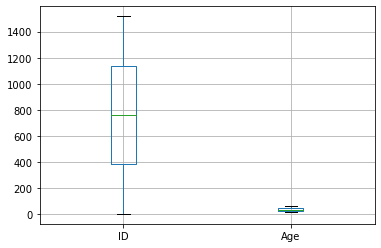

In [9]:
df.boxplot()

In [10]:
df.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Phone Type', 'Current Bike',
       'Relationship', 'Response'],
      dtype='object')

In [11]:
#Data preprocessing - Label Encoding
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Phone Type"] = le.fit_transform(df["Phone Type"])
df["Current Bike"] = le.fit_transform(df["Current Bike"])
df["Response"] = le.fit_transform(df["Response"])

In [12]:
#one hot encoding
df[["Self Employed", "Student", "Unemployed"]] = pd.get_dummies(df["Occupation"],drop_first=True)
df.drop("Occupation", axis= 1, inplace= True)
df.head()

,ID,Age,Gender,Phone Type,Current Bike,Relationship,Response,Self Employed,Student,Unemployed
0,1,53,1,0,1,Complicated,0,0,0,0
1,2,27,0,2,4,Single,1,1,0,0
2,3,39,0,0,1,Married,0,0,0,1
3,4,20,0,1,4,Married,0,0,0,1
4,5,29,1,0,1,Complicated,1,0,1,0


In [13]:
df[["Complicated", "Married", "Single"]] = pd.get_dummies(df["Relationship"],drop_first=True)
df.drop("Relationship", axis=1, inplace=True)
df.head()


,ID,Age,Gender,Phone Type,Current Bike,Response,Self Employed,Student,Unemployed,Complicated,Married,Single
0,1,53,1,0,1,0,0,0,0,1,0,0
1,2,27,0,2,4,1,1,0,0,0,0,1
2,3,39,0,0,1,0,0,0,1,0,1,0
3,4,20,0,1,4,0,0,0,1,0,1,0
4,5,29,1,0,1,1,0,1,0,1,0,0


In [14]:
#Feature Selection
X = df.drop(["ID","Response"],axis=1)
y = df["Response"]

In [15]:
X

,Age,Gender,Phone Type,Current Bike,Self Employed,Student,Unemployed,Complicated,Married,Single
0,53,1,0,1,0,0,0,1,0,0
1,27,0,2,4,1,0,0,0,0,1
2,39,0,0,1,0,0,1,0,1,0
3,20,0,1,4,0,0,1,0,1,0
4,29,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1513,19,1,1,0,0,1,0,0,0,0
1514,18,1,1,3,0,1,0,0,1,0
1515,24,0,1,1,0,1,0,0,1,0
1516,23,0,1,0,0,1,0,0,0,1


In [16]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1513    1
1514    1
1515    1
1516    1
1517    1
Name: Response, Length: 1518, dtype: int32

In [17]:
#Train test Split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [18]:
X_train

,Age,Gender,Phone Type,Current Bike,Self Employed,Student,Unemployed,Complicated,Married,Single
890,47,0,1,3,1,0,0,0,0,0
196,31,0,0,4,0,0,0,0,0,0
1063,23,0,1,0,0,1,0,0,0,1
601,33,1,1,2,0,0,1,1,0,0
106,51,1,2,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1424,24,0,1,1,0,1,0,0,1,0
1142,18,1,1,1,0,1,0,0,0,1
998,45,1,1,2,0,0,0,0,0,0
206,33,0,0,1,0,1,0,0,0,0


In [19]:
Y_train

890     0
196     1
1063    1
601     1
106     0
       ..
1424    1
1142    1
998     0
206     1
867     0
Name: Response, Length: 1214, dtype: int32

In [20]:
#Model Building

dtc = DecisionTreeClassifier()

In [21]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
dtc_predict = dtc.predict(X_test)

In [23]:
#Model Evaluation
accuracy_score(Y_test,dtc_predict)

0.7861842105263158

In [24]:
accuracy_score(Y_train,dtc.predict(X_train))

0.9967051070840197

In [25]:
print(confusion_matrix(Y_test,dtc_predict))

[[ 91  34]
 [ 31 148]]


In [26]:
print(confusion_matrix(Y_train,dtc.predict(X_train)))

[[521   0]
 [  4 689]]


In [27]:
#DECISION TREE IS AN OVERFITTING MODELLING. 
#IT BASICALLY GIVES GOOD ACCURACY FOR TRAINING DATA AND GIVES POOR ACCURACY FOR TESTING DATA
#IN OTHER TERMS IT OVERFITS THE TRAINING DATA AND CANNOT GENERALISE THE TEST DATA.

## IMPLEMENTING STRATIFIED K FOLD CROSS VALIDATION





In [34]:
stf = StratifiedKFold(n_splits= 10)

In [35]:
stf.get_n_splits(X,y)

10

In [36]:
dtc1 = DecisionTreeClassifier()

In [40]:
acc = []
for train_index,test_index in stf.split(X,y):
    #print("Train =",train_index,"Test =",test_index)
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    #print("X1 train shape:",X1_train.shape,"X1 test shape:",X1_test.shape)
    #print("y1 train shape:",y1_train.shape,"y1 test shape:",y1_test.shape)
    dtc1.fit(X1_train,y1_train)
    y_pred = dtc1.predict(X1_test)
    accuracy = accuracy_score(y1_test,y_pred)
    acc.append(accuracy)

In [41]:
acc

[0.5789473684210527,
 0.5131578947368421,
 0.6118421052631579,
 0.6447368421052632,
 0.9013157894736842,
 0.8881578947368421,
 0.8486842105263158,
 0.8421052631578947,
 0.8807947019867549,
 0.8741721854304636]

In [42]:
np.mean(acc)

0.7583914255838271

In [43]:
np.std(acc)

0.14406560043379432

## Hyperparameter Tuning

In [45]:
dtc2 = DecisionTreeClassifier()

In [52]:
param = {"criterion": ["gini","entropy"],"splitter":["best","random"],"max_features": [3,5,7,"auto","sqrt","log2"],
        "max_depth": [5,7,9,11,13],"min_weight_fraction_leaf": [0.1,0.3,0.5,0.7]}

In [53]:
model = GridSearchCV(dtc2,param,cv = 10)

In [54]:
model.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 13],
                         'max_features': [3, 5, 7, 'auto', 'sqrt', 'log2'],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5, 0.7],
                         'splitter': ['best', 'random']})

In [55]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [65]:
dtc_tune = DecisionTreeClassifier(criterion= "entropy",max_depth= 5,max_features= "sqrt",min_weight_fraction_leaf= 0.1,
                                 splitter= "best")

In [66]:
acc = []
for train_index,test_index in stf.split(X,y):
    #print("Train =",train_index,"Test =",test_index)
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    #print("X1 train shape:",X1_train.shape,"X1 test shape:",X1_test.shape)
    #print("y1 train shape:",y1_train.shape,"y1 test shape:",y1_test.shape)
    dtc_tune.fit(X1_train,y1_train)
    y_pred = dtc_tune.predict(X1_test)
    accuracy = accuracy_score(y1_test,y_pred)
    acc.append(accuracy)

In [67]:
acc

[0.4342105263157895,
 0.506578947368421,
 0.4868421052631579,
 0.5328947368421053,
 0.9276315789473685,
 0.9013157894736842,
 0.9473684210526315,
 0.9605263157894737,
 0.9602649006622517,
 0.9470198675496688]

In [68]:
np.mean(acc)

0.7604653189264552

In [69]:
np.std(acc)

0.22249080212825678

In [70]:
stf = StratifiedKFold(n_splits=10,shuffle=True,random_state= 5)

In [73]:
np.mean(cross_val_score(dtc_tune,X,y,cv= stf))

0.7352649006622517

In [74]:
np.std(cross_val_score(dtc_tune,X,y,cv= stf))

0.04448893039468699